# **Proyecto**

## *Detección y clasificación de Queratocono*

#### Zahid Medrano Flores  <p align="right">zahidmedrano@ciencias.unam.mx &emsp;</p>

## **Introducción**

El queratocono es una enfermedad ocular progresiva que afecta la córnea, una superficie transparente en la parte frontal del ojo. En condiciones normales, la córnea tiene una forma redondeada y superficie regular que permite que la luz se enfoque correctamente en la parte trasera del ojo. Sin embargo, en el queratocono, la córnea se debilita y adelgaza de manera gradual, haciendo que se abulte hacia afuera en forma de un cono (de ahí el nombre). Esta deformación irregular distorsiona la forma en que la luz entra en el ojo, provocando principalmente  visión borrosa.

Generalmente, el queratocono comienza a manifestarse en la adolescencia o principios de los veinte años y puede progresar a diferentes ritmos en cada individuo. A medida que la enfermedad avanza, la visión puede empeorar significativamente y no corregirse completamente con lentes correctivas convencionales.

La detección temprana del queratocono es crucial para para impedir su progresión. Existen varios métodos comunes utilizados para diagnosticar esta afección, en este proyecto nos enfocamos principalmente en las topografías cornéales. La *topografía corneal* crea un mapa de la superficie anterior de la córnea, mostrando irregularidades y elevaciones.

## **Problema**

El problema principal en nuestro pais radica principalmente en esta etapa de detección. En muchas instancias las personas ignoran los problemas que se tienen, pero muchas otras veces, es la dificultad de obtener respuestas claras por la falta de personas capacitadas y lugares especializados que sean capaces de darnos un diagnóstico claro. Lo ideal sería que muchas personas mas tengan acceso a los estudios necesarios y por otro lado, simplificar el proceso para ayudar a las mismas personas capacitadas.

## **¿Cómo se hará?**

El próposito principal de este proyecto se enfoca en poder realizar un primer diagnóstico, para saber si una persona tiene o no el padecimiento. En teoría tambien podría darnos una etapa del mismo, pero tenemos menos datos para la parte del queratocono mas avanzado.

A partir de un dataset, con alrededor de 3200 filas y 450 columnas, se realizó un preprocesamiento y se hicieron pruebas de distintos modelos predictivos, con los cuales se busca encontrar las varias etapas de queratocono que una persona pueda presentar.

<center> Para mayores detalles véase el Reporte Final. </center>

### **Preprocesamiento de los datos**

Primero se cargan las librerias que utilizaremos a lo largo del trabajo. Y simplemente comenzamos cargando los datos.

In [289]:
# librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression, mutual_info_classif

In [290]:
#Cargamos los datos y las etiquetas
data = pd.read_csv(r"Datos/dataset.csv")
labels = pd.read_csv(r"Datos/labels.csv")

Información general del dataframe

In [291]:
data.head(10)

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,En.Anterior.,ESI.Anterior.,ESI.Posterior.
0,9,1OS(Left),44.53,21,39.22,111,41.87,5.32,86.7,0.91,...,3.131,97,-0.722,3.350,1.053,3.512,99,Enable,45,27
1,10,1OD(Right),43.84,39,42.46,129,43.15,1.38,88.2,0.65,...,0.575,97,0.085,0.921,0.290,0.966,100,Enable,0,0
2,39,2OD(Right),44.81,66,44.41,156,44.61,0.40,83.0,0.48,...,0.177,9,0.268,0.263,0.640,0.692,100,Enable,0,0
3,55,4OS(Left),44.00,51,42.31,141,43.15,1.69,97.3,0.60,...,0.492,275,-0.281,3.396,1.419,3.680,100,Enable,0,29
4,56,4OD(Right),45.42,26,45.20,116,45.31,0.22,93.3,0.69,...,0.571,85,0.109,0.691,0.181,0.714,100,Enable,0,7
5,68,5OS(Left),62.98,68,42.51,158,52.74,20.47,95.5,0.25,...,3.791,45,-1.581,13.387,9.154,16.218,98,Enable,95,0
6,69,5OD(Right),44.23,85,42.86,175,43.54,1.37,96.7,0.43,...,0.269,88,0.105,0.398,0.376,0.548,100,Enable,0,0
7,87,6OD(Right),44.61,170,43.75,80,44.18,0.86,97.9,0.46,...,0.085,20,0.375,0.437,0.360,0.566,100,Enable,0,52
8,88,6OS(Left),44.13,174,43.03,84,43.58,1.10,97.2,0.46,...,0.146,229,0.353,0.371,0.485,0.611,100,Enable,0,63
9,138,8OD(Right),45.83,165,45.37,75,45.60,0.46,96.8,0.80,...,0.219,74,0.269,0.330,0.315,0.457,100,Enable,0,24


In [292]:
data.tail(10)

,Unnamed: 0,idEye,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,En.Anterior.,ESI.Anterior.,ESI.Posterior.
3152,12232,1809OS(Left),44.32,67,43.52,157,43.92,0.79,95.5,0.63,...,0.125,103,0.280,0.587,0.440,0.734,100,Enable,0,0
3153,12233,1810OS(Left),47.26,57,46.79,147,47.02,0.47,95.6,0.60,...,0.549,140,0.240,0.689,0.305,0.753,100,Enable,0,0
3154,12234,1810OD(Right),48.94,123,47.23,33,48.09,1.70,95.2,0.68,...,0.417,100,0.440,0.593,0.578,0.828,100,Enable,0,6
3155,12236,1811OS(Left),45.15,82,44.27,172,44.71,0.88,97.0,0.69,...,0.237,227,0.161,0.327,0.258,0.416,100,Enable,0,0
3156,12237,1812OS(Left),46.22,119,44.34,29,45.28,1.88,92.2,0.42,...,0.865,266,0.608,0.921,0.630,1.116,100,Enable,12,7
3157,12238,1812OD(Right),46.60,86,45.79,176,46.19,0.81,97.0,0.75,...,0.384,339,0.164,0.583,0.259,0.638,100,Enable,0,10
3158,12239,1813OS(Left),44.05,82,43.90,172,43.97,0.15,96.4,0.63,...,0.156,217,0.242,0.388,0.387,0.548,100,Enable,0,5
3159,12240,1813OD(Right),44.12,3,43.47,93,43.80,0.66,96.6,0.60,...,0.179,337,0.348,0.313,0.384,0.495,100,Enable,0,0
3160,12241,1814OS(Left),46.59,90,44.74,0,45.66,1.86,96.1,0.74,...,0.609,113,-0.124,1.092,0.842,1.379,100,Enable,0,0
3161,12242,1814OD(Right),46.49,79,45.38,169,45.93,1.11,96.5,0.73,...,0.280,56,0.001,0.726,0.348,0.805,100,Enable,0,0


In [293]:
#Informacion del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Columns: 448 entries, Unnamed: 0 to ESI.Posterior.
dtypes: float64(319), int64(127), object(2)
memory usage: 10.8+ MB


In [294]:
data.select_dtypes(include ='number').median()

Unnamed: 0          7762.500
Ks                    44.970
Ks.Axis               92.000
Kf                    43.790
Kf.Axis               87.000
                      ...   
S46.sph..like..5       0.434
HOAs.S3456..5          0.717
AA.5                 100.000
ESI.Anterior.          0.000
ESI.Posterior.         0.000
Length: 446, dtype: float64

In [295]:
data.select_dtypes(exclude='object').mean()

Unnamed: 0          7455.013599
Ks                    45.389712
Ks.Axis               90.914611
Kf                    43.843495
Kf.Axis               85.449715
                       ...     
S46.sph..like..5       0.749348
HOAs.S3456..5          1.330833
AA.5                  99.921252
ESI.Anterior.          5.567995
ESI.Posterior.         8.851044
Length: 446, dtype: float64

In [ ]:
sel_cols = [column for column, is_type in (data.dtypes=="object").items() if is_type]   #estas son las columnas que son objetos
sel_cols

['idEye', 'En.Anterior.']

In [297]:
print(data['En.Anterior.'])
print(data['idEye'])

0       Enable
1       Enable
2       Enable
3       Enable
4       Enable
         ...  
3157    Enable
3158    Enable
3159    Enable
3160    Enable
3161    Enable
Name: En.Anterior., Length: 3162, dtype: object
0           1OS(Left)
1          1OD(Right)
2          2OD(Right)
3           4OS(Left)
4          4OD(Right)
            ...      
3157    1812OD(Right)
3158     1813OS(Left)
3159    1813OD(Right)
3160     1814OS(Left)
3161    1814OD(Right)
Name: idEye, Length: 3162, dtype: object


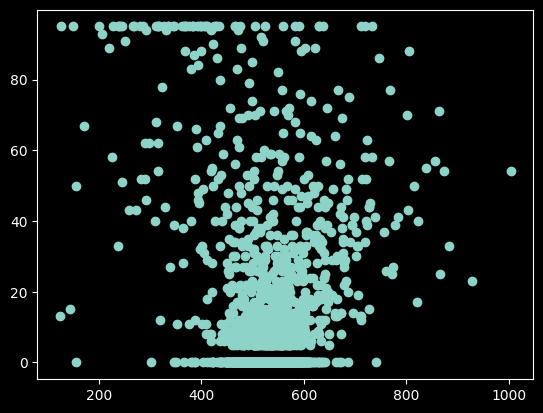

In [298]:
plt.scatter(data['Thinnest'], data['ESI.Posterior.'])

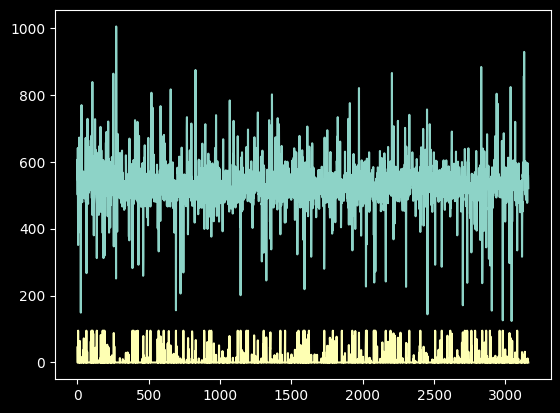

In [299]:
plt.plot(data['Thinnest'])
plt.plot(data['ESI.Anterior.'])

In [300]:
data.isnull().sum()
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3157    False
3158    False
3159    False
3160    False
3161    False
Length: 3162, dtype: bool

Se buscan solo los valores numéricos y que no sean constantes, para filtrarlos del dataset.

In [301]:
data_limpio = data.copy(deep=True)
data_limpio.drop('En.Anterior.', inplace=True, axis=1) #solo valores numéricos

var_thr = VarianceThreshold(threshold = 0.01) #Se quitan constantes y cuasiconstantes. Cambiando el threshold obtenemos mas o menos columnas
#Cambiando el threshold cambia el tamaño del dataframe que se utilizará

var_thr.fit(data_limpio.iloc[:,2: ])
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [302]:
concol = [column for column in data_limpio.iloc[:,2: ].columns 
          if column not in data_limpio.iloc[:,2: ].columns[var_thr.get_support()]]


data_limpio.drop(concol, inplace=True, axis=1)

In [303]:
#Valores numéricos e idEye numerico
data_numerico = pd.get_dummies(data['idEye'])
data_numerico

,1000OD(Right),1000OS(Left),1001OD(Right),1001OS(Left),1002OD(Right),1002OS(Left),1003OD(Right),1003OS(Left),1004OD(Right),1004OS(Left),...,996OD(Right),996OS(Left),997OD(Right),997OS(Left),998OD(Right),998OS(Left),999OD(Right),999OS(Left),9OD(Right),9OS(Left)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3158,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3159,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3160,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [304]:
data_num = pd.concat([data , data_numerico], axis=1).reindex(data.index)    #concatenamos los valores que obtuvimos
data_num.drop(columns=['idEye', 'En.Anterior.'], axis=1, inplace=True)  #quitamos ambas columnas categóricas
data_num

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,...,996OD(Right),996OS(Left),997OD(Right),997OS(Left),998OD(Right),998OS(Left),999OD(Right),999OS(Left),9OD(Right),9OS(Left)
0,9,44.53,21,39.22,111,41.87,5.32,86.7,0.91,41.67,...,False,False,False,False,False,False,False,False,False,False
1,10,43.84,39,42.46,129,43.15,1.38,88.2,0.65,43.14,...,False,False,False,False,False,False,False,False,False,False
2,39,44.81,66,44.41,156,44.61,0.40,83.0,0.48,44.70,...,False,False,False,False,False,False,False,False,False,False
3,55,44.00,51,42.31,141,43.15,1.69,97.3,0.60,43.16,...,False,False,False,False,False,False,False,False,False,False
4,56,45.42,26,45.20,116,45.31,0.22,93.3,0.69,45.29,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,12238,46.60,86,45.79,176,46.19,0.81,97.0,0.75,46.18,...,False,False,False,False,False,False,False,False,False,False
3158,12239,44.05,82,43.90,172,43.97,0.15,96.4,0.63,44.00,...,False,False,False,False,False,False,False,False,False,False
3159,12240,44.12,3,43.47,93,43.80,0.66,96.6,0.60,43.82,...,False,False,False,False,False,False,False,False,False,False
3160,12241,46.59,90,44.74,0,45.66,1.86,96.1,0.74,45.77,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#copiamos el dataset "limpio" para codificar las clases
le = LabelEncoder()
data_le = data_limpio.copy(deep = True)

In [306]:
type(data_le)

label = le.fit_transform(data_le['idEye'].values)
label

array([1638, 1637, 1822, ..., 1593, 1596, 1595], shape=(3162,))

In [ ]:
data_le.drop('idEye', axis=1, inplace=True)
data_le['idEye'] = label
data_le.head(10)

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,...,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5,AA.5,ESI.Anterior.,ESI.Posterior.,idEye
0,9,44.53,21,39.22,111,41.87,5.32,86.7,0.91,41.67,...,3.131,97,-0.722,3.350,1.053,3.512,99,45,27,1638
1,10,43.84,39,42.46,129,43.15,1.38,88.2,0.65,43.14,...,0.575,97,0.085,0.921,0.290,0.966,100,0,0,1637
2,39,44.81,66,44.41,156,44.61,0.40,83.0,0.48,44.70,...,0.177,9,0.268,0.263,0.640,0.692,100,0,0,1822
3,55,44.00,51,42.31,141,43.15,1.69,97.3,0.60,43.16,...,0.492,275,-0.281,3.396,1.419,3.680,100,0,29,2204
4,56,45.42,26,45.20,116,45.31,0.22,93.3,0.69,45.29,...,0.571,85,0.109,0.691,0.181,0.714,100,0,7,2203
5,68,62.98,68,42.51,158,52.74,20.47,95.5,0.25,49.96,...,3.791,45,-1.581,13.387,9.154,16.218,98,95,0,2399
6,69,44.23,85,42.86,175,43.54,1.37,96.7,0.43,43.55,...,0.269,88,0.105,0.398,0.376,0.548,100,0,0,2398
7,87,44.61,170,43.75,80,44.18,0.86,97.9,0.46,44.14,...,0.085,20,0.375,0.437,0.360,0.566,100,0,52,2592
8,88,44.13,174,43.03,84,43.58,1.10,97.2,0.46,43.52,...,0.146,229,0.353,0.371,0.485,0.611,100,0,63,2593
9,138,45.83,165,45.37,75,45.60,0.46,96.8,0.80,45.60,...,0.219,74,0.269,0.330,0.315,0.457,100,0,24,2968


<Axes: xlabel='ESI.Posterior.'>

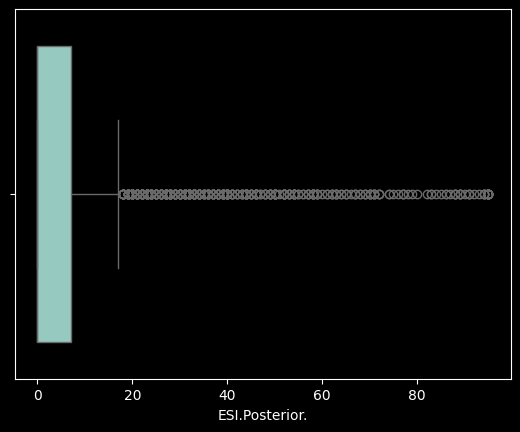

In [308]:
#parte exploratoria del dataframe
sns.boxplot(x='ESI.Posterior.', data=data)   #podemos cambiar la columna

In [309]:
X = data_le.iloc[:,2:].values
y = labels.iloc[:,-1].values

In [310]:
labels

,Unnamed: 0,Data.PLOS_One.idEye,clster_labels
0,1,1OS(Left),1
1,2,1OD(Right),2
2,3,2OD(Right),2
3,4,4OS(Left),1
4,5,4OD(Right),2
...,...,...,...
3157,3158,1812OD(Right),2
3158,3159,1813OS(Left),2
3159,3160,1813OD(Right),2
3160,3161,1814OS(Left),2


In [311]:
le = LabelEncoder()
for i in range(X.shape[1]):
    X[:,i] = le.fit_transform(X[:,i])
y = le.fit_transform(y)

In [312]:
# el scaler se realiza como parte de la "normalización", pero al ser un RandomForest no es necesario
#solo se utiliza para el PCA
standard_scaler = StandardScaler()
#X = standard_scaler.fit_transform(X)

In [313]:
classes , conteos = np.unique(y, return_counts=True)
nClasses = len(classes)

print('Salida : ', nClasses)
print('Clases : ', classes)

Salida :  4
Clases :  [0 1 2 3]


Conteo por clase:
Clase 0: 264
Clase 1: 2595
Clase 2: 221
Clase 3: 82


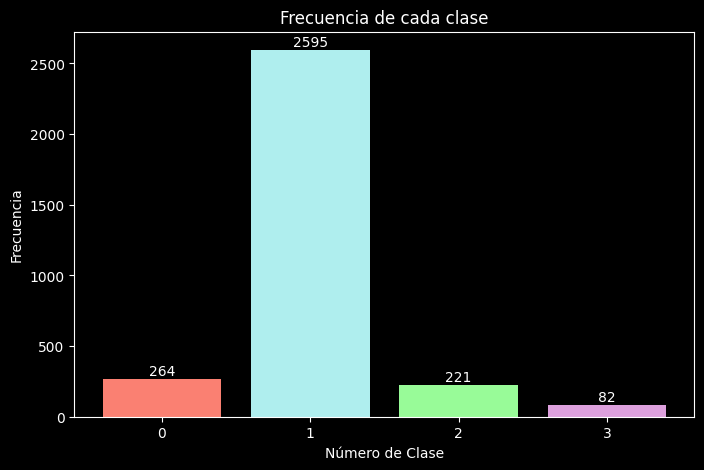

In [314]:
print("Conteo por clase:")
for classe, conteo in zip(classes, conteos):
    print(f"Clase {classe}: {conteo}")

plt.figure(figsize=(8, 5))


color = ['salmon', 'paleturquoise', 'palegreen', 'plum']
plt.bar(classes.astype(str), conteos, color=color)

for i, conteo in enumerate(conteos):
    plt.text(i, conteo + 5, str(conteo), ha='center', va='bottom')

plt.title('Frecuencia de cada clase')
plt.xlabel('Número de Clase')
plt.ylabel('Frecuencia')
plt.xticks(classes.astype(str))

plt.show()

In [315]:
#podemos cambiar el tamaño del set de entrenamiento y test, utilizaremos un 85 / 15
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.80, random_state = None)

### **Entrenamiento**

Entrenamos un modelo sencillo, con nuestro dataset ya algo limpio.

In [327]:
trainedforest = RandomForestClassifier(n_estimators=150,
                                       random_state = None,
                                       n_jobs = -1).fit(X_train,y_train)

Accuracy: 0.9494736842105264
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        38
           1       0.95      0.99      0.97       397
           2       1.00      0.63      0.78        30
           3       0.90      0.90      0.90        10

    accuracy                           0.95       475
   macro avg       0.93      0.82      0.87       475
weighted avg       0.95      0.95      0.95       475



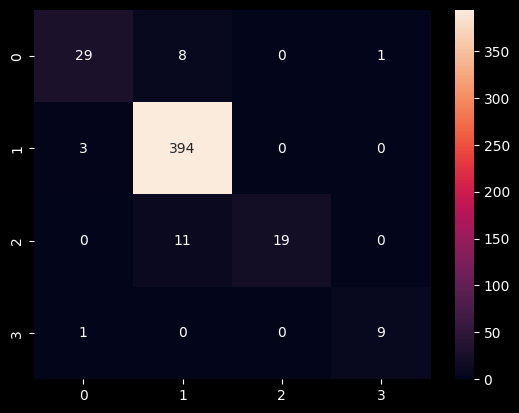

In [328]:
predictionforest = trainedforest.predict(X_test)    #para la inferencia

print("Accuracy:", accuracy_score(y_test, predictionforest))
sns.heatmap(confusion_matrix(y_test, predictionforest), annot = True, fmt = 'g')    #Una matriz de confusión, para ver el desempeño
print(classification_report(y_test, predictionforest))  #reporte del modelo

##### - **Hiperparámetros del RandomForest**
Utilizando los paramétros de nuestra optimización, podemos intentar mejorar el modelo

##### - **GridSearch**

In [318]:
trainedforestGS = RandomForestClassifier(n_estimators=400,
                                        min_samples_split= 2,
                                        min_samples_leaf= 1,
                                        max_features = 'sqrt',
                                        max_depth= None,
                                        bootstrap= False,
                                        random_state = None,
                                        n_jobs=-1).fit(X_train,y_train)

Accuracy: 0.9731437598736177
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.98      0.99      0.98       516
           2       0.92      0.78      0.84        45
           3       0.95      0.95      0.95        22

    accuracy                           0.97       633
   macro avg       0.96      0.92      0.94       633
weighted avg       0.97      0.97      0.97       633



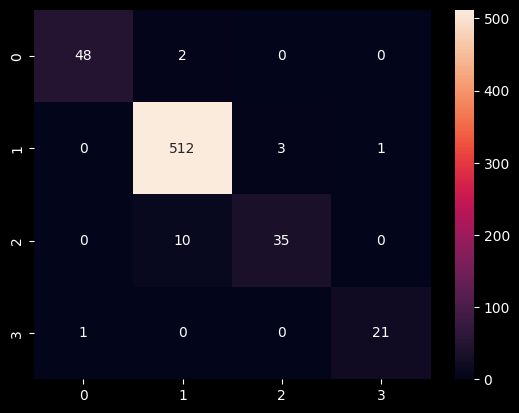

In [319]:
predictionforest1 = trainedforestGS.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictionforest1))
sns.heatmap(confusion_matrix(y_test, predictionforest1), annot = True, fmt = 'g')
print(classification_report(y_test, predictionforest1))

##### - **RandomizedSearch**

In [320]:
trainedforestRS = RandomForestClassifier(n_estimators= 693,
                                    max_depth= 105,
                                    max_features= 'sqrt',
                                    min_samples_leaf= 4,
                                    min_samples_split=7,
                                    bootstrap= False,
                                    n_jobs=-1).fit(X_train, y_train)

Accuracy: 0.9699842022116903
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        50
           1       0.98      0.99      0.98       516
           2       0.90      0.82      0.86        45
           3       0.95      0.91      0.93        22

    accuracy                           0.97       633
   macro avg       0.94      0.91      0.93       633
weighted avg       0.97      0.97      0.97       633



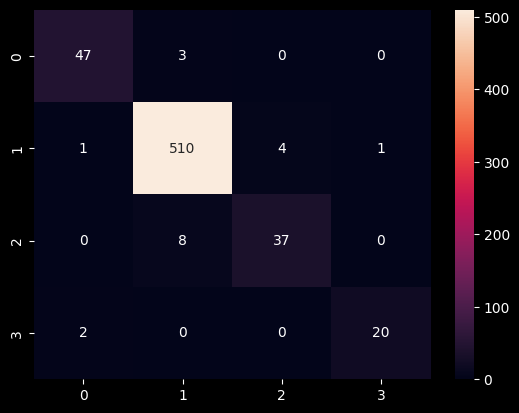

In [321]:
predictionforest2 = trainedforestRS.predict(X_test) # inferencia

print("Accuracy:", accuracy_score(y_test, predictionforest2))
sns.heatmap(confusion_matrix(y_test, predictionforest2), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest2))  # reporte del modelo

### **Aplicación de PCA**

Como se había comentado, la estandarización no es necesaria para un RandomForest, pero si queremos aplicar un PCA si lo necesitamos, aquí solo rehacemos el dataframe y le aplicamos la función.

In [322]:
X = standard_scaler.fit_transform(X)    # estandarización
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=None)  # 85 / 15

In [323]:
pca = PCA(n_components=4)   # aplicación sencillisima de PCA
 
X_train_pca = pca.fit_transform(X_train) # fit para el entrenamiento
X_test_pca = pca.transform(X_test)

# varianza del PCA
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print('Varianza total por componente: {}'.format(explained_variance))
print('Varianza total: {}'.format(total_explained_variance))

Varianza total por componente: [0.28575197 0.14127122 0.05423412 0.04044474]
Varianza total: 0.5217020433529471


##### **Entrenamiento PCA**

Volvemos a aplicar los 3 modelos que tenemos, el "normal" y los dos ajustados.

Accuracy: 0.9557894736842105
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.96      0.99      0.98       397
           2       0.86      0.63      0.73        30
           3       0.90      0.90      0.90        10

    accuracy                           0.96       475
   macro avg       0.92      0.85      0.88       475
weighted avg       0.95      0.96      0.95       475



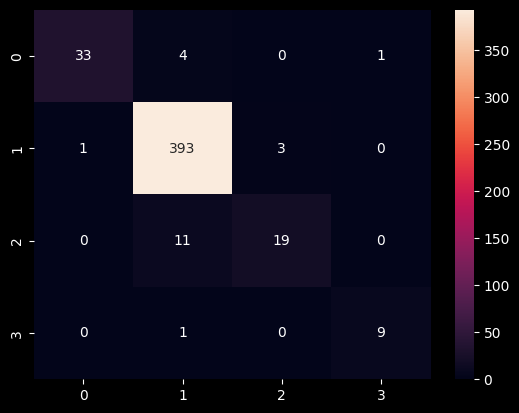

In [324]:
trainedforest_pca = trainedforest.fit(X_train_pca,y_train)  # RandomForest número 1 con PCA

predictionforest_pca = trainedforest_pca.predict(X_test_pca)    # inferencia

print("Accuracy:", accuracy_score(y_test, predictionforest_pca))
sns.heatmap(confusion_matrix(y_test, predictionforest_pca), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest_pca))  # reporte del modelo 1

Accuracy: 0.9536842105263158
              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.96      0.99      0.97       397
           2       0.83      0.63      0.72        30
           3       0.90      0.90      0.90        10

    accuracy                           0.95       475
   macro avg       0.91      0.85      0.88       475
weighted avg       0.95      0.95      0.95       475



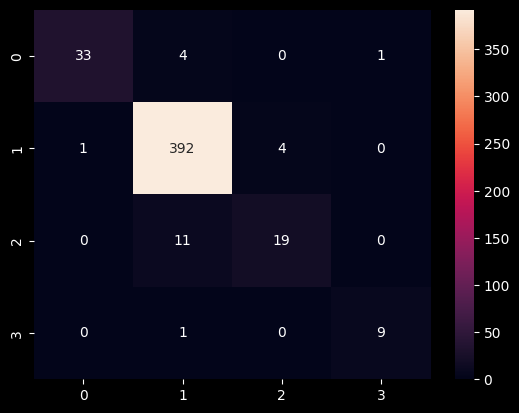

In [325]:
trainedforest_pca1 = trainedforestGS.fit(X_train_pca,y_train)    # RandomForest número 2 con PCA. GridSearch

predictionforest_pca1= trainedforest_pca1.predict(X_test_pca)    # inferencia

print("Accuracy:", accuracy_score(y_test, predictionforest_pca1))
sns.heatmap(confusion_matrix(y_test, predictionforest_pca1), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest_pca1))  # reporte del modelo

Accuracy: 0.9515789473684211
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.96      0.99      0.97       397
           2       0.83      0.63      0.72        30
           3       0.90      0.90      0.90        10

    accuracy                           0.95       475
   macro avg       0.91      0.84      0.87       475
weighted avg       0.95      0.95      0.95       475



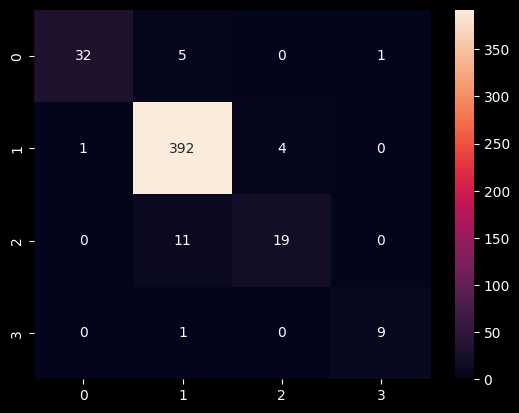

In [326]:
trainedforest_pca2 = trainedforestRS.fit(X_train_pca,y_train)    # RandomForest número 3 con PCA. RandomizedSearch

predictionforest_pca2 = trainedforest_pca2.predict(X_test_pca)    # inferencia

print("Accuracy:", accuracy_score(y_test, predictionforest_pca2))
sns.heatmap(confusion_matrix(y_test, predictionforest_pca2), annot = True, fmt = 'g')    # matriz de confusión
print(classification_report(y_test, predictionforest_pca2))  